In [10]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pymongo
from bson import ObjectId
import time
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from math import log10
from scipy import stats
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime,timezone
# matplotlib.rcParams['timezone'] = 'US/Eastern'
pd.set_option('display.max_columns', None)
import json
from urllib.parse import quote
from time import mktime

In [2]:
from mongodata import mongodata
mongodata=mongodata.TAAPI(username='potsdam',password='sensors')

7007 inlet facing sampling tube/ 7008 outlet facing sampling tube

In [15]:
data=mongodata.concat(7007,7008,startTime='2021-07-02 09:16:00',endTime='2021-07-02 09:58:00')
data=mongodata.resample_concat(data,windowSize=60)

__________________________________________________________________________________________
 
All sensors are online!
 
2 devices returned
__________________________________________________________________________________________


In [90]:
data['sr']=data['pn03_t']/data['pn03_b']
data['mr']=data['pn10_t']/data['pn10_b']
data['lr']=data['pn50_t']/data['pn50_b']

In [91]:
df7=data[data['device_id']==7007]
df8=data[data['device_id']==7008]

In [9]:
aps=pd.read_excel('/Users/nuerailikuerbanjiang/Downloads/DustTest1.xlsx')
aps=aps.T
aps=aps.rename(columns=aps.iloc[0])
aps=aps[1:]
aps=aps.reset_index()
aps= aps.iloc[:, 6:62]

cols = aps.columns.drop(['Start Time','Date'])
aps[cols] = aps[cols].apply(pd.to_numeric, errors='coerce')
aps['sum'] = aps[list(aps.columns)].sum(axis=1)
aps['small']= aps[list(aps.iloc[:, 5:14])].sum(axis=1)
aps['medium']= aps[list(aps.iloc[:, 14:36])].sum(axis=1)
aps['large']= aps[list(aps.iloc[:, 36:56])].sum(axis=1)

aps.loc[:,'Date'] = pd.to_datetime(aps.Date.astype(str)+' '+aps['Start Time'].astype(str))
aps['Date']=aps['Date'] + pd.to_timedelta(4, unit='m')


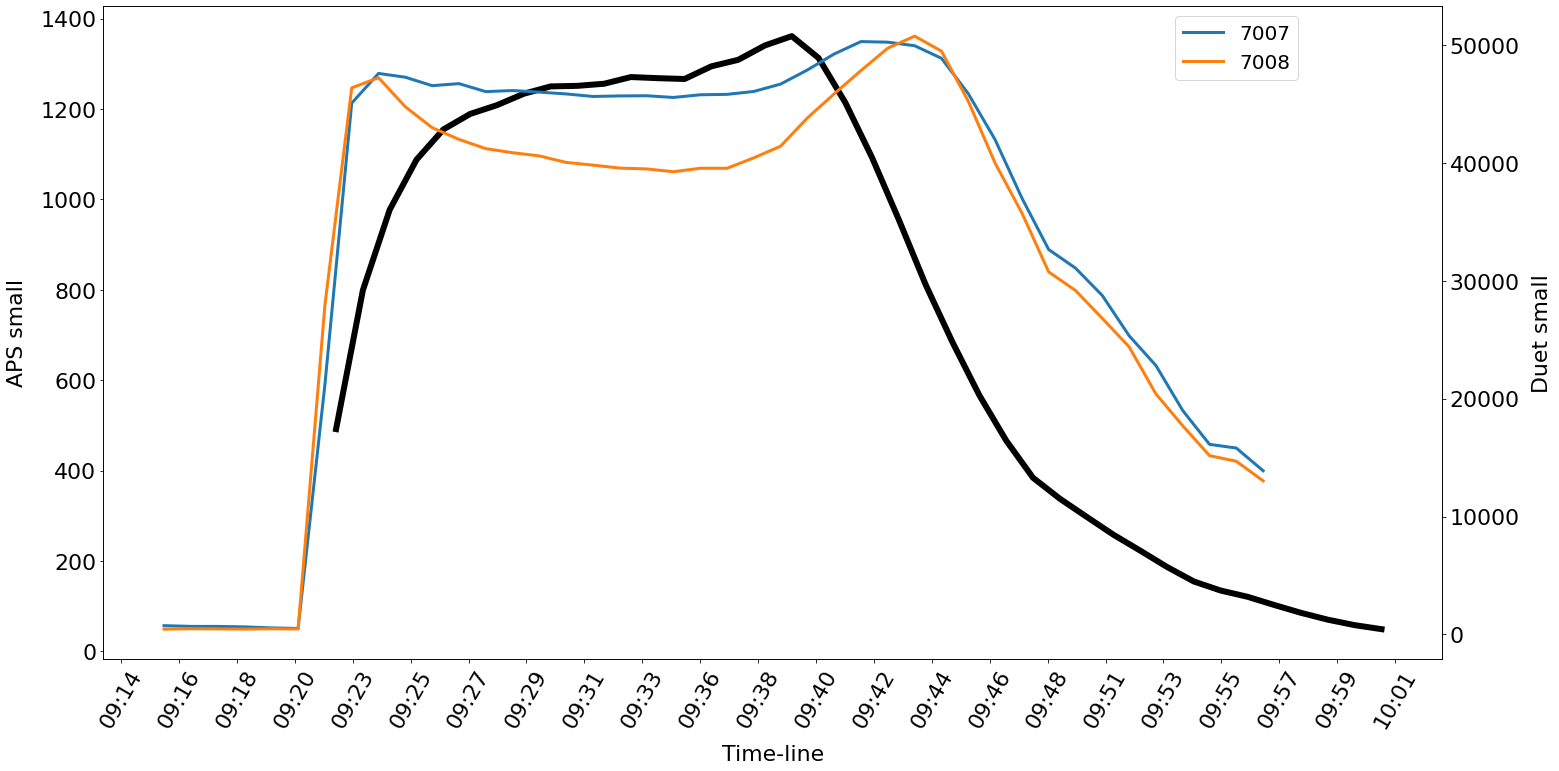

In [86]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax2 = ax1.twinx()


ax1.plot(aps['Date'], aps['small'],  linewidth=6, color='k',label='aps')

ax2.plot(df7.Date, df7['small'], linewidth=3, label='7007')
ax2.plot(df8.Date, df8['small'], linewidth=3, label='7008')
    
plt.xticks(size=15)
plt.yticks(size=15)

ax1.grid(False)
plt.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))

ax1.set_xlabel("Time-line", fontsize=22, color='k', labelpad=13)
ax1.set_ylabel("APS small", fontsize=22, color='k', labelpad=13)
ax2.set_ylabel("Duet small", fontsize=22, color='k', labelpad=13)




for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(22)
        
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

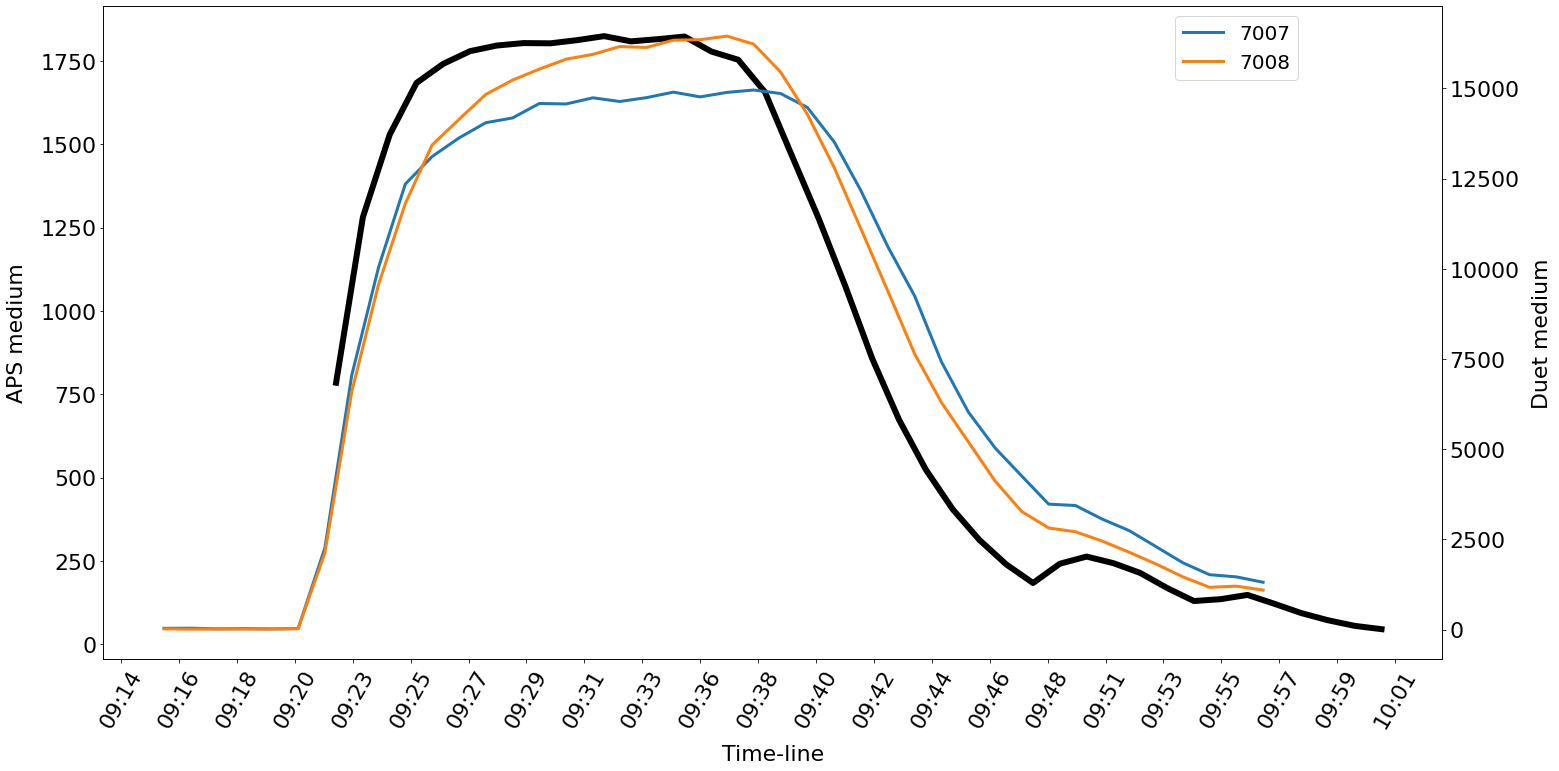

In [88]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax2 = ax1.twinx()


ax1.plot(aps['Date'], aps['medium'],  linewidth=6, color='k',label='aps')

ax2.plot(df7.Date, df7['medium'], linewidth=3, label='7007')
ax2.plot(df8.Date, df8['medium'], linewidth=3, label='7008')
    
plt.xticks(size=15)
plt.yticks(size=15)

ax1.grid(False)
plt.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))

ax1.set_xlabel("Time-line", fontsize=22, color='k', labelpad=13)
ax1.set_ylabel("APS medium", fontsize=22, color='k', labelpad=13)
ax2.set_ylabel("Duet medium", fontsize=22, color='k', labelpad=13)




for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(22)
        
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

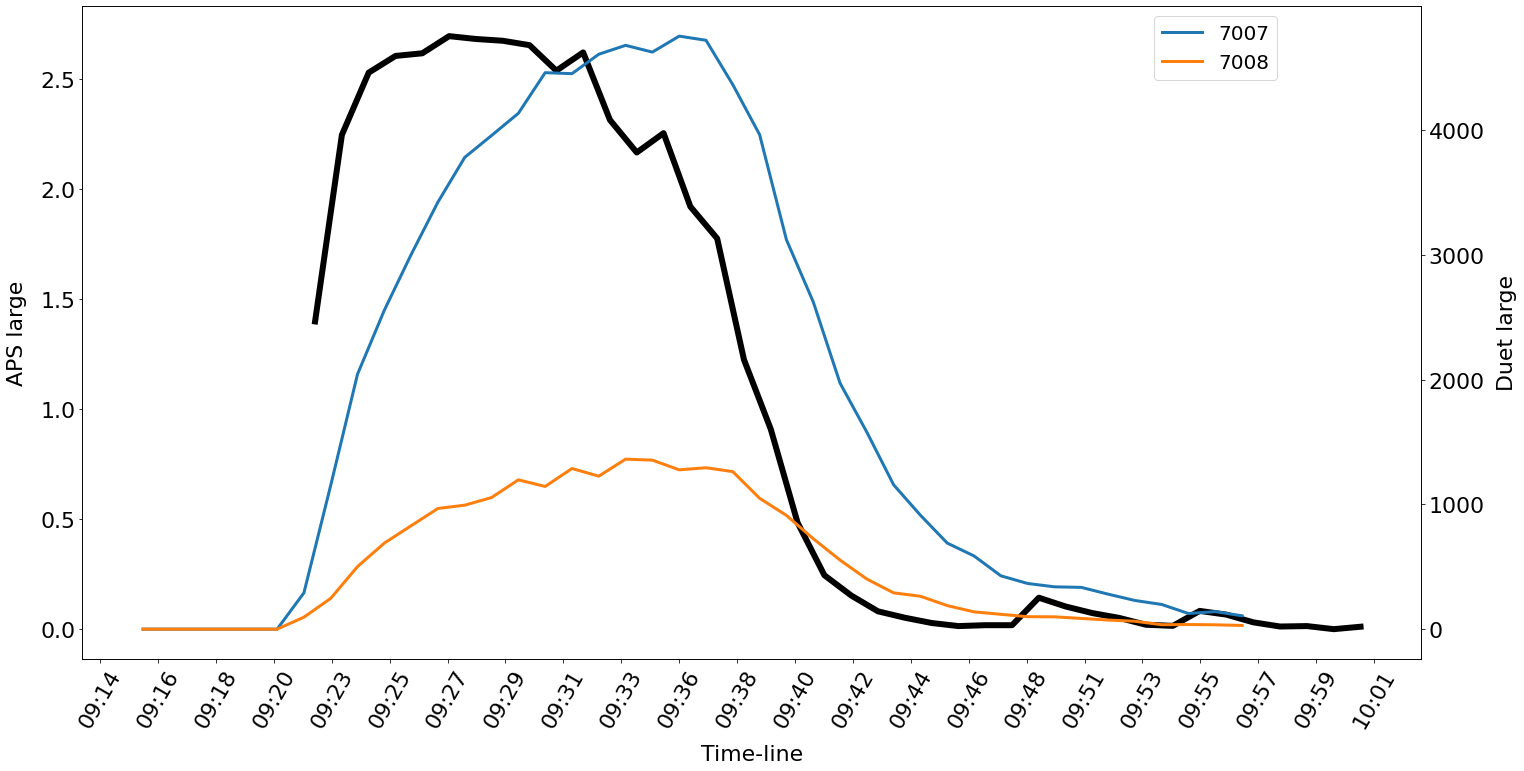

In [84]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax2 = ax1.twinx()


ax1.plot(aps['Date'], aps['large'],  linewidth=6, color='k',label='aps')

ax2.plot(df7.Date, df7['large'], linewidth=3, label='7007')
ax2.plot(df8.Date, df8['large'], linewidth=3, label='7008')
    
plt.xticks(size=15)
plt.yticks(size=15)

ax1.grid(False)
plt.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))

ax1.set_xlabel("Time-line", fontsize=22, color='k', labelpad=13)
ax1.set_ylabel("APS large", fontsize=22, color='k', labelpad=13)
ax2.set_ylabel("Duet large", fontsize=22, color='k', labelpad=13)




for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(22)
        
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

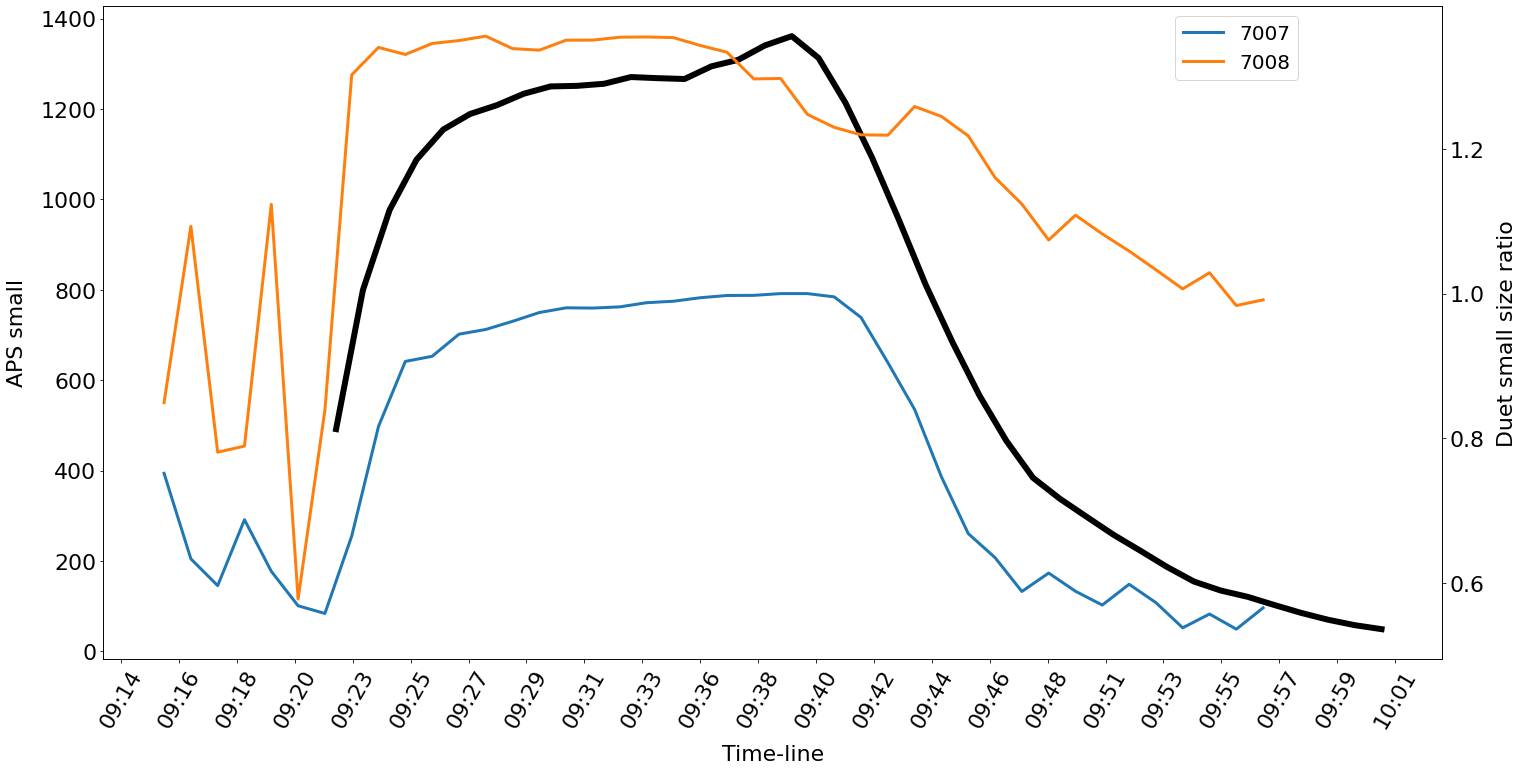

In [96]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax2 = ax1.twinx()


ax1.plot(aps['Date'], aps['small'],  linewidth=6, color='k',label='aps')

ax2.plot(df7.Date, df7['sr'], linewidth=3, label='7007')
ax2.plot(df8.Date, df8['sr'], linewidth=3, label='7008')
    
plt.xticks(size=15)
plt.yticks(size=15)

ax1.grid(False)
plt.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))

ax1.set_xlabel("Time-line", fontsize=22, color='k', labelpad=13)
ax1.set_ylabel("APS small", fontsize=22, color='k', labelpad=13)
ax2.set_ylabel("Duet small size ratio", fontsize=22, color='k', labelpad=13)




for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(22)
        
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

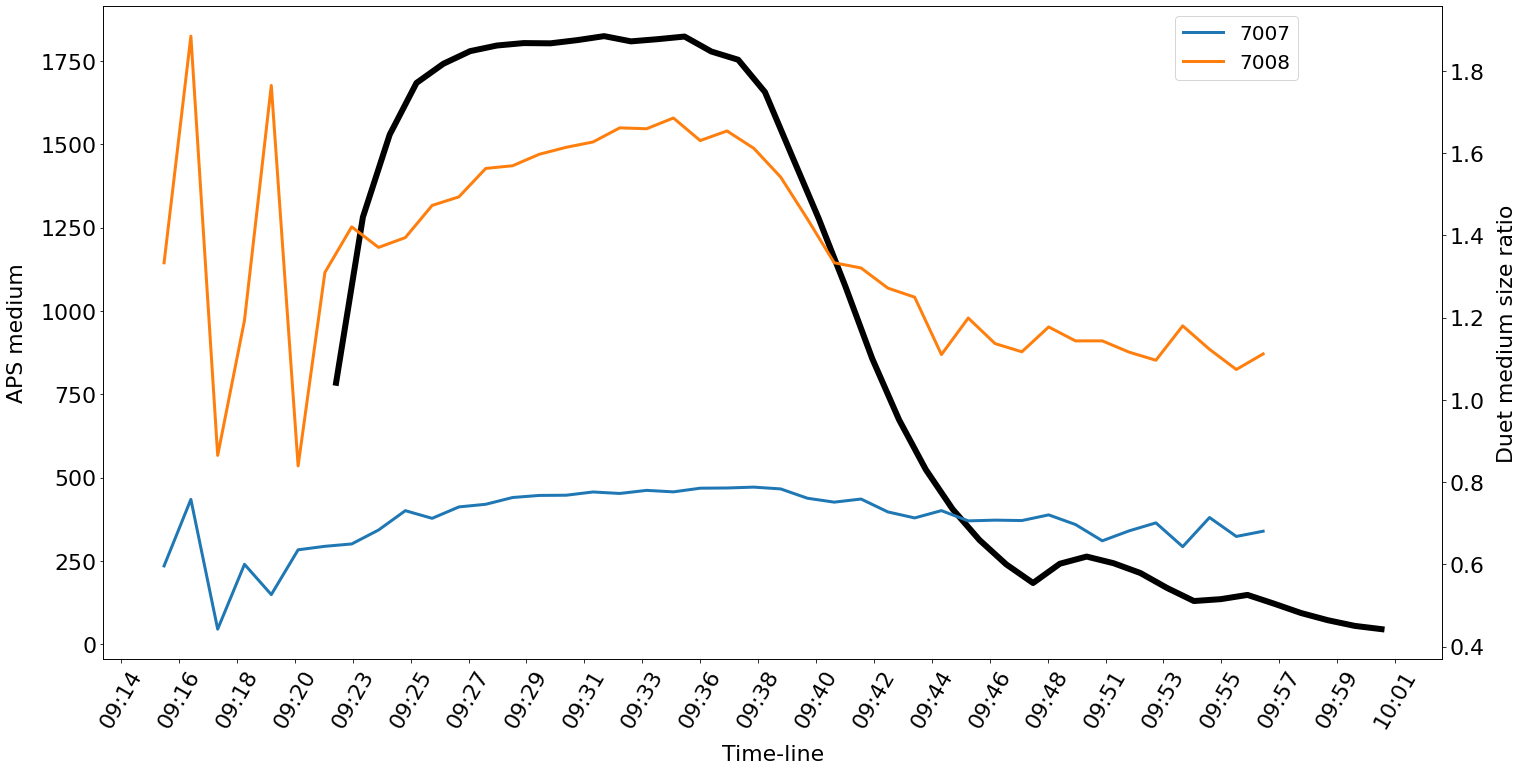

In [97]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax2 = ax1.twinx()


ax1.plot(aps['Date'], aps['medium'],  linewidth=6, color='k',label='aps')

ax2.plot(df7.Date, df7['mr'], linewidth=3, label='7007')
ax2.plot(df8.Date, df8['mr'], linewidth=3, label='7008')
    
plt.xticks(size=15)
plt.yticks(size=15)

ax1.grid(False)
plt.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))

ax1.set_xlabel("Time-line", fontsize=22, color='k', labelpad=13)
ax1.set_ylabel("APS medium", fontsize=22, color='k', labelpad=13)
ax2.set_ylabel("Duet medium size ratio", fontsize=22, color='k', labelpad=13)




for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(22)
        
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

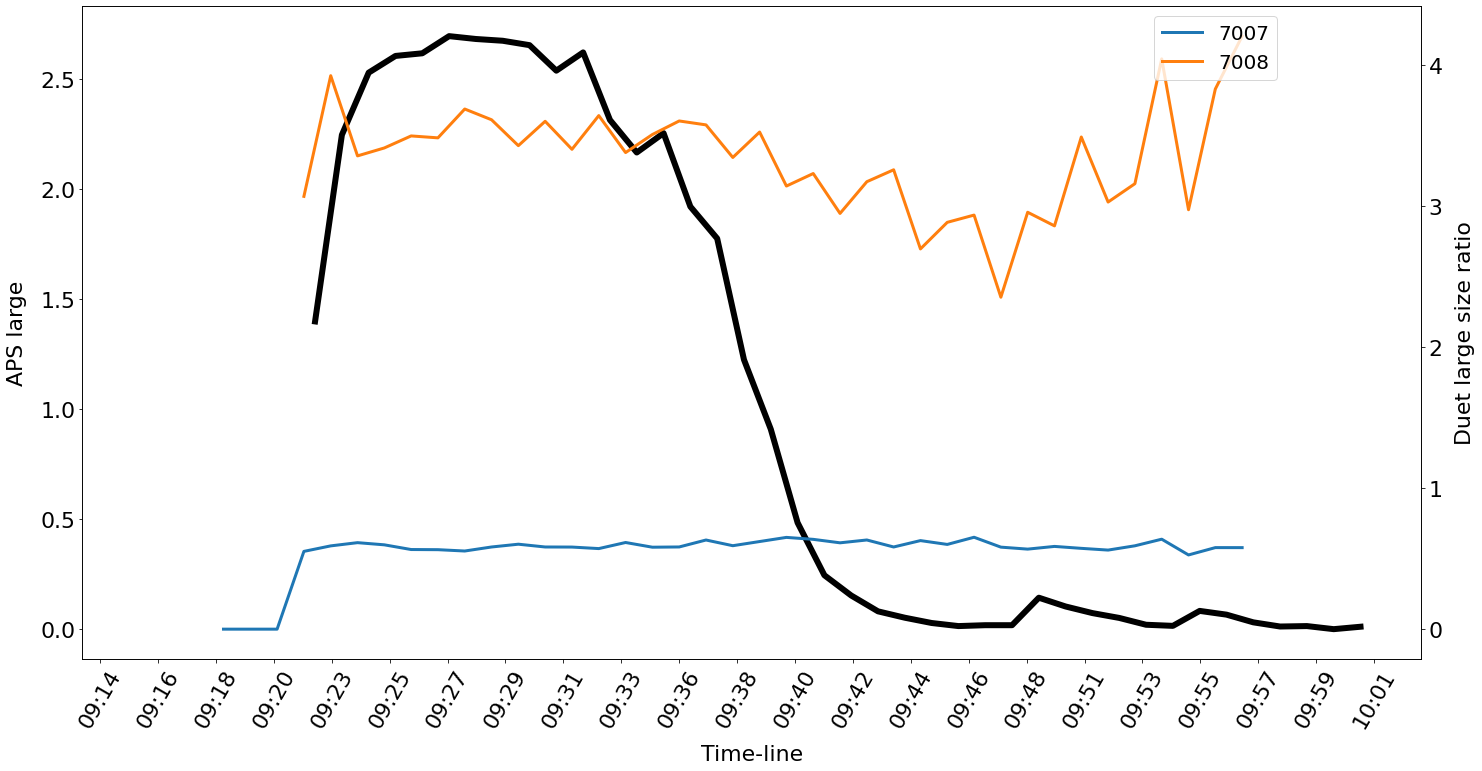

In [98]:
fig, ax1 = plt.subplots()
fig.set_size_inches(24, 12)

ax2 = ax1.twinx()


ax1.plot(aps['Date'], aps['large'],  linewidth=6, color='k',label='aps')

ax2.plot(df7.Date, df7['lr'], linewidth=3, label='7007')
ax2.plot(df8.Date, df8['lr'], linewidth=3, label='7008')
    
plt.xticks(size=15)
plt.yticks(size=15)

ax1.grid(False)
plt.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
plt.rcParams["legend.markerscale"] = 15
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(27))

ax1.set_xlabel("Time-line", fontsize=22, color='k', labelpad=13)
ax1.set_ylabel("APS large", fontsize=22, color='k', labelpad=13)
ax2.set_ylabel("Duet large size ratio", fontsize=22, color='k', labelpad=13)




for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.xaxis.get_majorticklabels():
    label.set_fontsize(22)
        
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

In [48]:
k=aps.iloc[:, 5:56]
k['Date']=aps['Start Time']
k=k.set_index('Date')
k=k.T
k=k.sort_index()

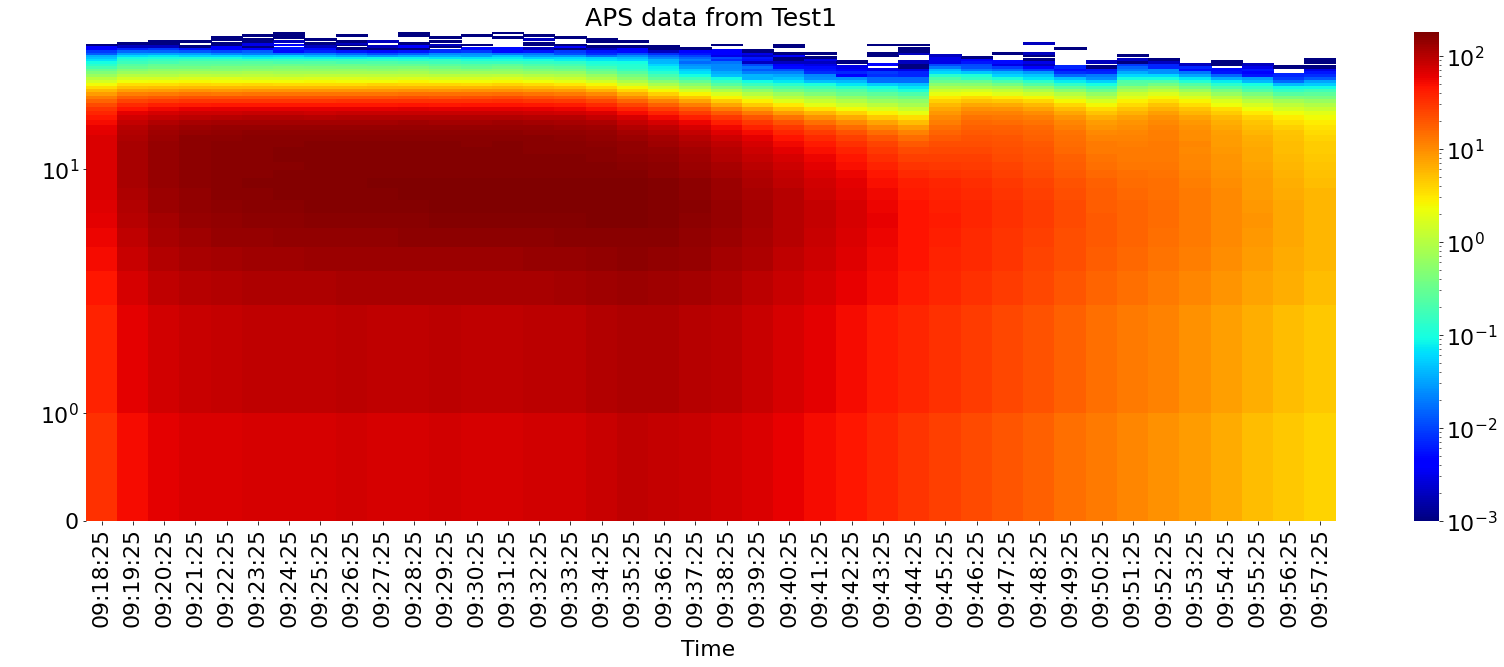

In [49]:
from matplotlib.colors import LogNorm, Normalize

f, ax = plt.subplots(figsize=(28, 9))

sns.heatmap(k, ax=ax,yticklabels=10,cmap="jet",norm=LogNorm())


ax.set_xlabel('Time ',color='k',fontsize=22,labelpad=13)
ax.set_ylabel('Sizes',color='w',fontsize=22,labelpad=13)

ax.set_title('APS data from Test1',fontsize=25)

plt.xticks(size = 22,color='k')
plt.yticks(size = 22,color='k')
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=22)


for label in ax.yaxis.get_ticklabels():
    label.set_rotation(0)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
    
ax.set_yscale('symlog')
ax.invert_yaxis()

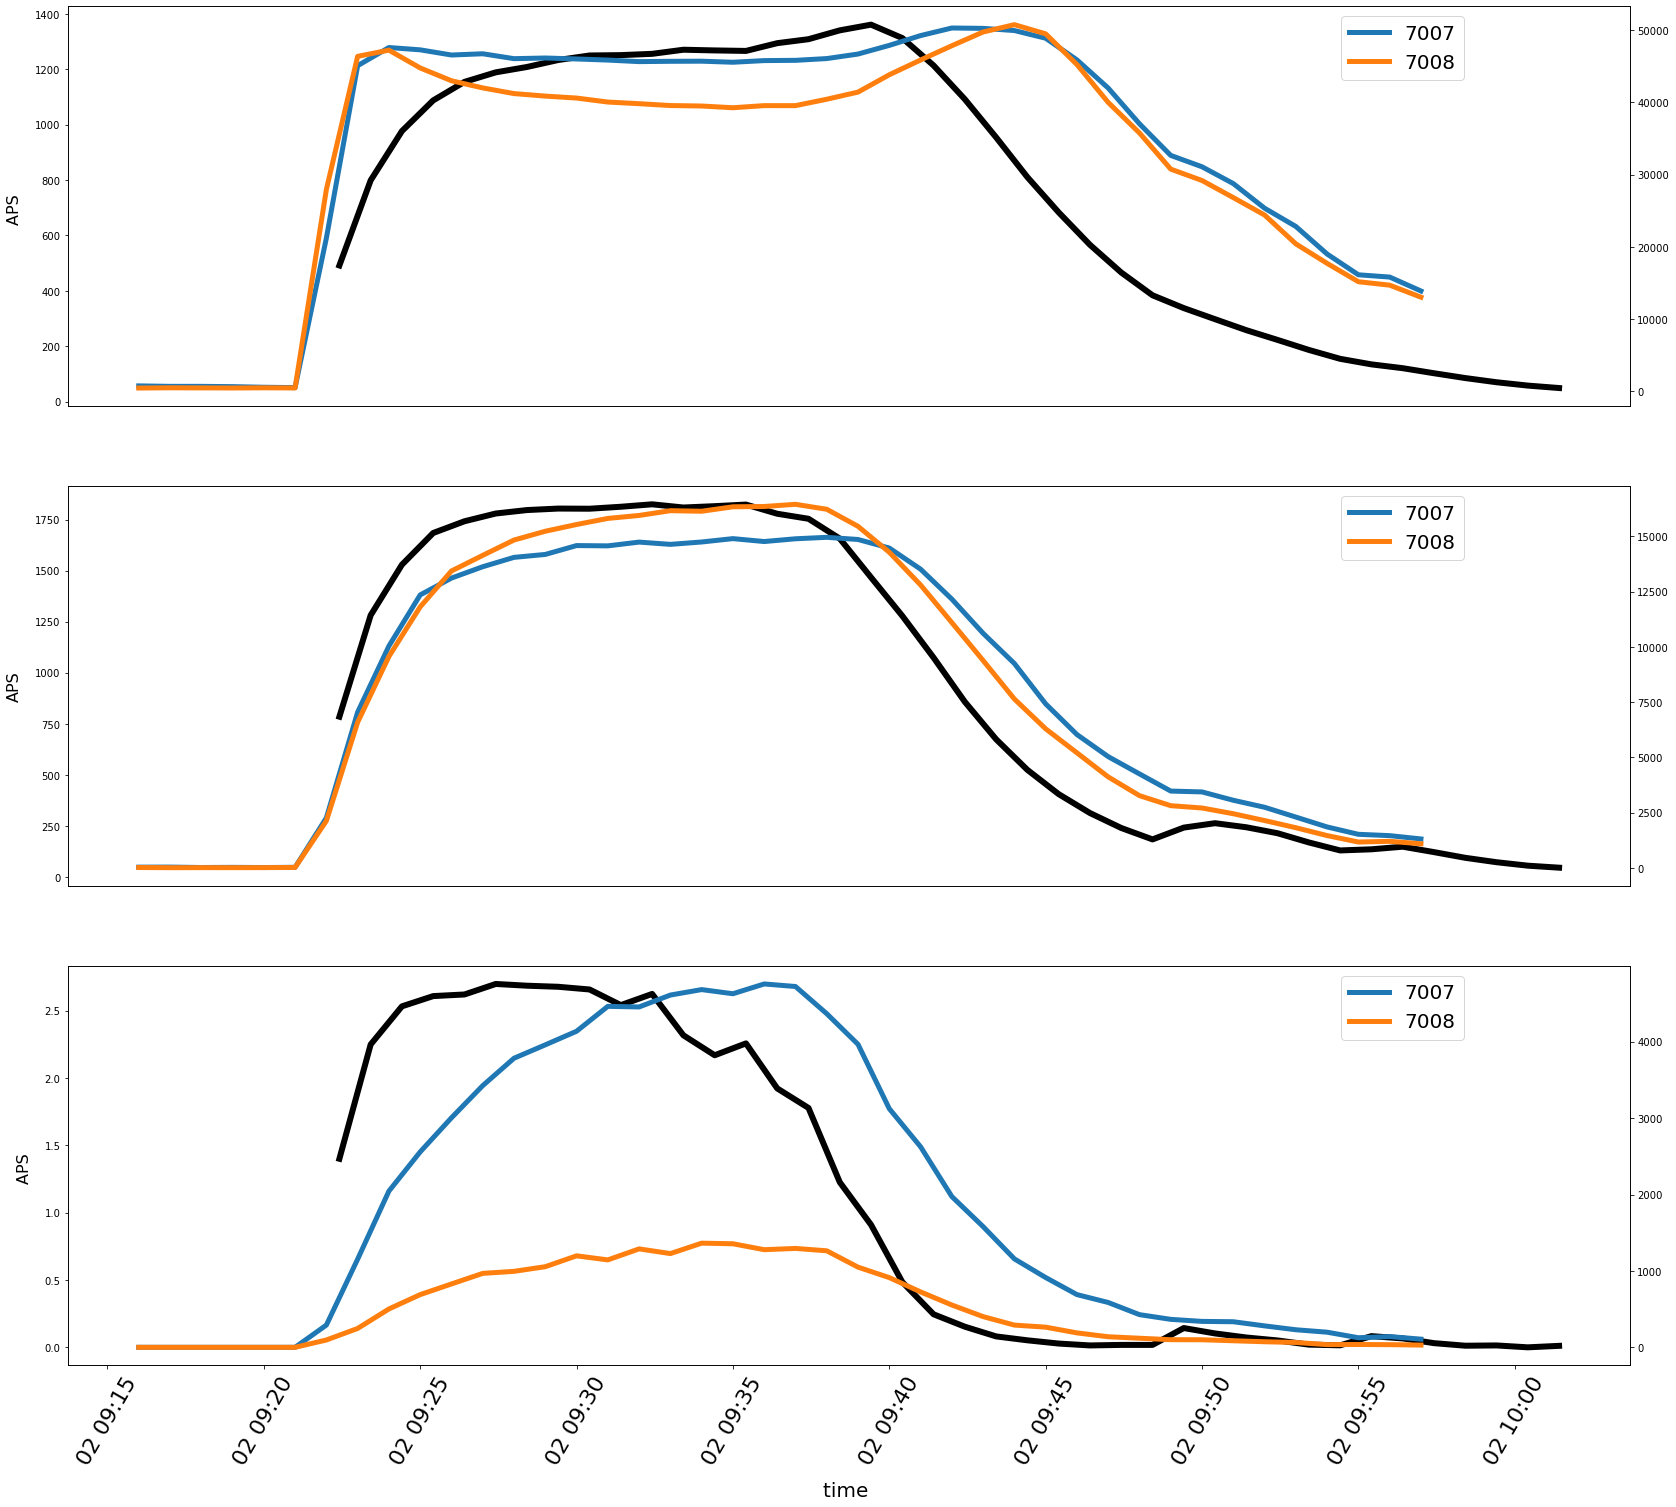

In [165]:




fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()


ax1.plot(aps['Date'], aps['small'],  linewidth=6, color='k',label='small')
ax2.plot(aps['Date'], aps['medium'],  linewidth=6, color='k',label='medium')
ax3.plot(aps['Date'], aps['large'],  linewidth=6, color='k',label='large')



ax1t.plot(df7.Date, df7['small'], linewidth=5, label='7007')
ax1t.plot(df8.Date, df8['small'], linewidth=5, label='7008')
ax2t.plot(df7.Date, df7['medium'], linewidth=5, label='7007')
ax2t.plot(df8.Date, df8['medium'], linewidth=5, label='7008')
ax3t.plot(df7.Date, df7['large'], linewidth=5, label='7007')
ax3t.plot(df8.Date, df8['large'], linewidth=5, label='7008')



x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(60)
    label.set_fontsize(22)
    
ax1t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)



